## 5. Text Analysis and NLP

#### Step 1: Basic Setup and NLP

In [571]:
# pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
df_nlp = pd.concat([df_small['review_body'], df_small['sentiment']], 
                   axis=1, keys=['review_body', 'sentiment'])
df_nlp.head(1)

,review_body,sentiment
0,"as advertised. everything works perfectly, i'm very happy with the camera. as a matter of fact i'm going to buy another one for my 2nd car.",1


In [658]:
df_new2 = df_small.query('num_words == 2')

In [575]:
X = df_nlp['review_body']
y = df_nlp['sentiment']

X_full = df_small['review_body']
y_full = df_small['star_rating']

In [504]:
from sklearn.feature_extraction.text import CountVectorizer

In [505]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(df_nlp["review_body"])

# 3. Transform
X_train = bagofwords.transform(df_nlp["review_body"])
X_train

<92027x53424 sparse matrix of type '<class 'numpy.int64'>'
	with 3673730 stored elements in Compressed Sparse Row format>

In [506]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [507]:
# Let's now make a document-term matrix that's based on our training data.
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train = bagofwords.transform(X_train)
X_train

<61658x42834 sparse matrix of type '<class 'numpy.int64'>'
	with 2455570 stored elements in Compressed Sparse Row format>

We know that when we train a model on some training data and want to test the same model, the testing data has to be in the exact same format as the training data. This means that the train and test data have to contain the same features. This means that we have to use the bag-of-words vectorizer fitted to our training data to transform our test data as well.

In [508]:
X_test = bagofwords.transform(X_test)
X_test

<30369x42834 sparse matrix of type '<class 'numpy.int64'>'
	with 1206613 stored elements in Compressed Sparse Row format>

In [511]:
# Fitting a model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)
# Test Score
logreg.score(X_test, y_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9542314054948263

Train: 0.9542314054948263
Test: 0.916888932793309

Let's try a KNN model and compare the results

In [513]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7909598105679717
0.7864928051631598


Train: 0.7909598105679717
Test: 0.7864928051631598

In [515]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
word_counts

array([450,  82,  10, ...,   1,   1,   1], dtype=int64)

In [516]:
words = np.array(bagofwords.get_feature_names())
words

array(['00', '000', '0000', ..., 'эта', 'этой', 'языках'], dtype='<U53')

In [517]:
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})

words_df.sort_values(by="count", ascending=False).head(10)

,word,count
37837,the,191905
21346,it,121485
4214,and,100896
38423,to,95288
21250,is,60737
38032,this,56594
16632,for,52463
25538,my,47359
26647,of,42069
20169,in,38372


In [518]:
# Re-building train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Removing Stop Words

In [520]:
bagofwords2 = CountVectorizer(stop_words="english")

bagofwords2.fit(X_train)
X_train = bagofwords2.transform(X_train) 
X_test = bagofwords2.transform(X_test) 

In [521]:
X_train

<61658x42528 sparse matrix of type '<class 'numpy.int64'>'
	with 1386570 stored elements in Compressed Sparse Row format>

In [522]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords2.get_feature_names())

words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
17992,great,19717
8447,case,15784
29596,product,14323
17740,good,14116
21705,just,12864
39922,use,12308
22778,like,11673
21022,ipod,10876
41737,works,10303
41696,work,8721


In [523]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)
# Test Score
logreg.score(X_test,y_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9545719939018457

Train: 0.9545719939018457

Test: 0.9048042411669794

In [526]:
# Next, let's remove infrequent words

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords3 = CountVectorizer(stop_words="english", min_df = 5)
bagofwords3.fit(X_train)
X_train = bagofwords3.transform(X_train)
X_test = bagofwords3.transform(X_test)

In [528]:
X_train

<61658x11076 sparse matrix of type '<class 'numpy.int64'>'
	with 1340832 stored elements in Compressed Sparse Row format>

In [530]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
print(logreg.score(X_train, y_train))
# Test Score
print(logreg.score(X_test, y_test))

0.9466898050536833
0.9043103164411077


/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train: 0.9466898050536833

Test: 0.9043103164411077

In [531]:
coefficients = logreg.coef_
coefficients

array([[-0.39431772, -0.5035902 ,  0.42421809, ...,  0.83890881,
         0.05595228,  0.21891078]])

In [532]:
indices = coefficients.argsort()[0]

In [533]:
# The words with the lowest coefficients 
# most predictive of a 0 (negative review)
np.array(bagofwords3.get_feature_names())[indices[:20]]

array(['worst', 'rotation', 'terrible', 'poor', 'waste', 'garbage',
       'concept', 'disappointing', 'unusable', 'rt', 'freezes', 'useless',
       'worthless', 'stopped', 'dissatisfied', 'awful', 'cheaply',
       'unacceptable', 'disappointed', 'horrible'], dtype='<U20')

In [534]:
# The words with the highest coefficients
# most predictive of a 1 (positive review)

np.array(bagofwords3.get_feature_names())[indices[-20:]]

array(['perfectly', 'highly', 'pleasantly', 'worry', 'complaint', 'glad',
       'protects', 'bonus', 'amazed', 'earlier', 'meets', 'flawlessly',
       'awesome', 'excelent', 'amazing', 'perfect', 'love', 'skeptical',
       'excellent', 'loves'], dtype='<U20')

##### Stemming and Lemmatization

Next up, Let's do some Stemming and Lemmatization

In [535]:
import nltk

stemmer = nltk.stem.PorterStemmer()

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords4 = CountVectorizer(min_df=5, tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                              stop_words='english')
bagofwords4.fit(X_train)

X_train = bagofwords4.transform(X_train)
X_test = bagofwords4.transform(X_test)

X_train

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 's

<61658x15044 sparse matrix of type '<class 'numpy.int64'>'
	with 1534350 stored elements in Compressed Sparse Row format>

In [537]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
print(logreg.score(X_train,y_train))
# Test Score
print(logreg.score(X_test,y_test))

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9408511466476369

In [538]:
# Test Score
logreg.score(X_test,y_test)

0.8980210082650071

In [539]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))

words = np.array(bagofwords4.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
0,,86637
13308,thi,53846
14366,wa,29866
14771,work,21125
14100,use,18818
14236,veri,18458
6320,great,14538
3009,case,12797
7579,just,12596
7968,like,12363


##### Punctuation

In [540]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [542]:
# A sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# After splitting the text based on spaces
# We stem and remove punctuation
for word in sentence.split(' '):
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    print(stemmed_word)

the
quick
brown
fox
jump
over
the
lazi
dog


In [541]:
nltk.download('stopwords')

from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davepenny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [543]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [544]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords5 = CountVectorizer(min_df=5, tokenizer=my_tokenizer)
bagofwords5.fit(X_train)
X_train = bagofwords5.transform(X_train)
X_test = bagofwords5.transform(X_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [545]:
X_train

<61658x8359 sparse matrix of type '<class 'numpy.int64'>'
	with 1471706 stored elements in Compressed Sparse Row format>

In [546]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords5.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
8214,work,25139
7835,use,21758
3392,great,19279
5162,one,17057
1498,case,17051
5749,product,15209
3323,good,13869
8243,would,13128
4372,like,12801
3259,get,12438


In [547]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9340393785072497

In [548]:
# Test Score
logreg.score(X_test, y_test)

0.9015114096611676

In [549]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords6 = CountVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
bagofwords6.fit(X_train)
X_train = bagofwords6.transform(X_train)
X_test = bagofwords6.transform(X_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [550]:
X_train

<61658x71404 sparse matrix of type '<class 'numpy.int64'>'
	with 2409579 stored elements in Compressed Sparse Row format>

In [551]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords6.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
68984,work,25139
64972,use,21758
26528,great,19279
41749,one,17057
10414,case,17051
47611,product,15209
25459,good,13869
70256,would,13128
34198,like,12801
24287,get,12438


In [552]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9878199098251647

In [553]:
# Test Score
logreg.score(X_test, y_test)

0.9140570976983108

In [554]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [555]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [556]:
X_train

<61658x71404 sparse matrix of type '<class 'numpy.float64'>'
	with 2409579 stored elements in Compressed Sparse Row format>

In [557]:
word_weights = np.array(np.sum(X_train, axis=0)).reshape((-1,))

words = np.array(tfidf.get_feature_names())
words_df = pd.DataFrame({"word": words, 
                         "weight": word_weights})
words_df.sort_values(by="weight", ascending=False).head(10)

,word,weight
68984,work,1469.43
26528,great,1280.60
64972,use,1035.88
10414,case,1013.45
25459,good,1005.89
47611,product,969.62
41749,one,865.91
36271,love,803.86
34198,like,760.63
31069,ipod,727.48


In [558]:
# fitting a logistic regression model again
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9376561030198839

In [559]:
# Test Score
logreg.score(X_test,y_test)

0.9115216174388356

##### TFIDF Vectorization

All of the above was great, but lets get back to what matters.

Back to the original problem at hand:

In [563]:
# Let's restore original data in X and y from up top where we define
# both X and y in terms of df_small
X_full = X
y_full = y

X = X_full
y = y_full

In [576]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

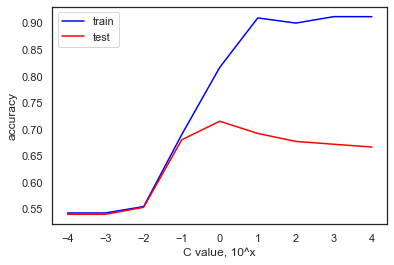

In [583]:
# Now we have our data Vectorized (i.e. a table numerical rows/columns)
# so we can build a model on it
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    
    # Instantiate & fit the model
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train, y_train)
    
    # Keep track of the train & test accuacies
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

# Visualize the train & test accuracies across c-values
plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value, 10^x')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [584]:
# Refit the model with the best C-value (10^0, i.e. 1)
my_best_model = LogisticRegression(C=1)
my_best_model.fit(X_train, y_train)

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [585]:
coefs = logreg.coef_
tokens = tfidf.get_feature_names()

results = pd.DataFrame({'tokens': tokens, 'coef': coefs[0]})
results.head()


,tokens,coef
0,0,6.09
1,0 gaug,0.38
2,0 gaug wire,0.17
3,0 star,6.75
4,0 star would,1.76


In [586]:
# Sort the rows by the coefficient of the word/token (from lowest to highest)
results.sort_values(by='coef', inplace=True)

# Display 20 most negative tokens
display(results.head(20))

# Display 20 most positive tokens
display(results.tail(20))

,tokens,coef
36271,love,-35.49
44017,perfect,-33.91
20607,excel,-30.92
18840,easi,-29.34
5151,awesom,-25.27
6388,best,-25.24
44188,perfectli,-25.11
3321,amaz,-22.56
20534,exactli,-21.98
40591,nice,-20.79


,tokens,coef
17813,doesnt fit,13.97
5067,aw,13.98
9692,cannot,14.03
67066,wast money,14.94
17941,doesnt work,16.13
29920,imposs,16.23
21294,fail,16.64
70249,worthless,18.11
15398,crap,18.96
52344,return,19.71


In [578]:
# Test Score
logreg.score(X_test,y_test)

0.7150383614870427

##### Confusion Matrix 

Here is the CM for our best model TFIDF

In [579]:
from sklearn.metrics import confusion_matrix

preds = logreg.predict(X_test)

con_mat = confusion_matrix(y_test,preds)
con_mat

array([[ 4680,   203,   219,   759],
       [ 1117,   279,   319,   604],
       [  269,    80,  1725,  3722],
       [  348,    56,   958, 15031]])

In [581]:
# making the confusion matrix a bit more clear

df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1','Predicted 2','Predicted 3'],
                 index = ['True 0','True 1','True 2','True 3'])

df_con_mat

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
True 0,4680,203,219,759
True 1,1117,279,319,604
True 2,269,80,1725,3722
True 3,348,56,958,15031


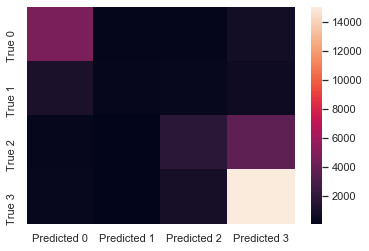

In [582]:
# heat map
sns.heatmap(df_con_mat)
plt.show()

##### Model Comparison and Tweaking

Compare the performance of CountVectorizer to TfidfVectorizer, with and without stemming and removing stop words. How does the performance differ in this case? When would it make a larger difference?

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

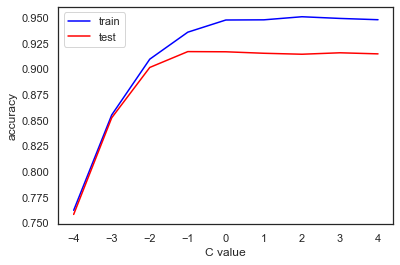

In [587]:
# Test CountVectorizer vs TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bagofwords = CountVectorizer(min_df = 5)
bagofwords.fit(X_train)

X_train = bagofwords.transform(X_train)
X_test = bagofwords.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Imposing a minimum document frequency of 5 (min_df=5), the top Test Set accuracy of the CountVectorizer data (above) is slightly lower than the top Test Set accuracy of the TfidfVectorizer (~80% back in question 2).

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

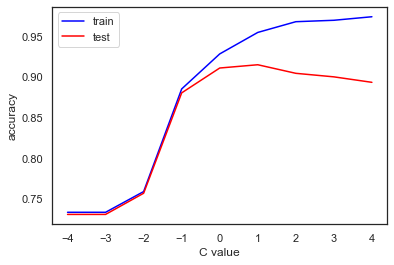

In [588]:
# Stemming vs No Stemming -- using the Porter Stemmer from the NLTK package
# (using Tfidf Vectorizer)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

stemmer = nltk.stem.PorterStemmer()

tfidf = TfidfVectorizer(min_df = 5, tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')])
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

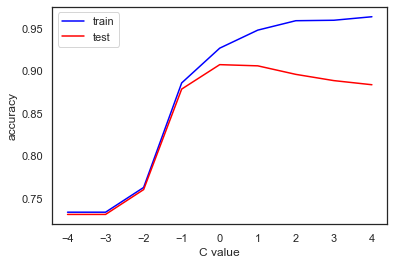

In [589]:
# Removing stop words vs not
# (using Tfidf Vectorizer, and without stemming the tokens)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tfidf = TfidfVectorizer(min_df = 5, stop_words='english')
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [590]:
preds = logreg.predict(X_test)

con_mat = confusion_matrix(y_test,preds)
con_mat

array([[ 5754,  1675],
       [ 1540, 18640]])

#### Step 2: Advanced NLP

Now that we have the basics taken care of and we know which model preforms the best, let's set up our dataframes as taught by Kris

## 6. Machine Learning

Using our insights, lets train some models.

In [ ]:
#Setting up our variables
y_train = df_train['Reviewer_Score']
X_train = df_train.drop(['Reviewer_Score'], axis=1)

y_test = df_test['Reviewer_Score']
X_test = df_test.drop(['Reviewer_Score'], axis=1)

# We'll need these later
y_train2 = y_train
X_train2 = X_train

y_test2 = y_test
X_test2 = X_test

In [169]:
df1 = df_small

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
#Lets take a look at the Varience Inflation Factor on ONLY low corrolated columns
VIF = []

df_small = df1.drop('num_words', axis=1)

for i in df_small:
    X = df_small[[
        'star_rating',
        'sentiment',
#         'num_words',
        'num_unique_words',
        "num_chars",
        'num_stopwords'
       
        ]]
    
    low_vif_df = X
    y = df['sentiment']
    
    X_withconst = sm.add_constant(X)
    
    #Lets store our results
    VIF = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])],index=X.columns)
    
    #Lets make a pretty table to show our results
    pd.options.display.float_format = '{:.2f}'.format
    
VIF_Frame = pd.DataFrame(VIF, columns=['VIF Value'])

VIF_Frame

,VIF Value
star_rating,34.24
sentiment,29.19
num_unique_words,23.78
num_chars,60.44
num_stopwords,57.09


In [79]:
# seaborn uses the average linkage by default
# sns.clustermap(df_pair_plot, col_cluster=False);

In [186]:
#Violin Plots
# f, axes = plt.subplots(3, 1, figsize=(10,20))
# sns.violinplot(x='sentiment', y='num_words', data=df_small, ax=axes[0])
# axes[0].set_xlabel('Sentiment', fontsize=12)
# axes[0].set_title("Number of words in each class", fontsize=15)

# sns.violinplot(x='sentiment', y='num_chars', data=df_small, ax=axes[1])
# axes[1].set_xlabel('Sentiment', fontsize=12)
# axes[1].set_title("Number of characters in each class", fontsize=15)

# sns.violinplot(x='sentiment', y='num_punctuations', data=df_small, ax=axes[2])
# axes[2].set_xlabel('Sentiment', fontsize=12)
# axes[2].set_title("Number of punctuations in each class", fontsize=15)
# plt.show()

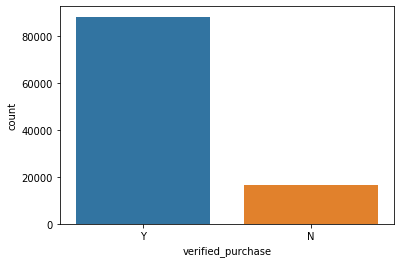

In [126]:
sns.countplot(x='verified_purchase', data=df)

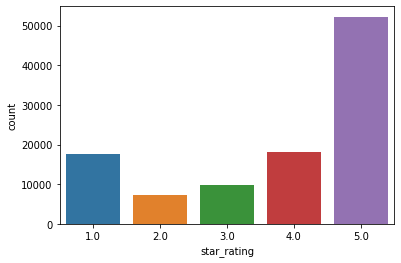

In [127]:
sns.countplot(x='star_rating', data=df)

In [228]:
# df_for_plot = df.sample(frac=.05, random_state=42)
# a = sns.FacetGrid(df_for_plot, col="star_rating", row="verified_purchase")
# a.map(plt.hist, "verified_purchase", alpha=1)
# # a.add_legend();

In [119]:
df_cluster = df_for_cluster

In [124]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 4)
#Fit the model to the data
k_means_model.fit(df_for_cluster);

ValueError: could not convert string to float: 'N'

Thoughts
- Just because you have trustworthy reviews, doesn't mean you'll get a good product.

Trustworthy reviews
 - Longer
 - Amazon Verified Purchase
 - Ratio of Reviews is 10 one stars for every 90 five stars
 - Number of words in 'superlative' Dictionary is high. (Kind of like stop words)
 - Good grammer and punctuation.
 
Endgame
 - Be able to count the number of products a store has
 - Have a "Country of Sale Origin" Indicating where you'll be getting the product from.

### Handling imbalanced datasets

Here you can see we have a larger number of `positive` samples vs. `negative` ones. There are a number of techniques to blance this dataset out and the two most popular approaches are to either under-sample or over-sample. With under sampling you remove rows to balance the dataset out and in over sampling you can duplicate entries in the daatset which could lead to overfitting. This discussion is beyond the scope of this lab. You will under sample the data to balance the dataset but you can find more information [here]().

1    24557
0    24557
Name: sentiment, dtype: int64


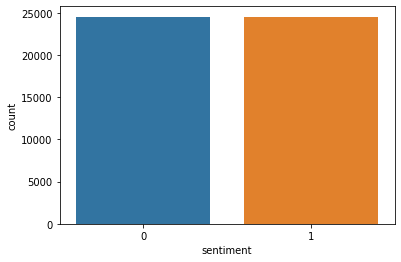

In [34]:
from sklearn.utils import resample

positive = df[df['sentiment']==1]
negative = df[df['sentiment']==0]

positive_downsampled = resample(positive,
                                replace = False, # sample without replacement
                                n_samples = len(negative), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive_downsampled, negative])

# checking counts
print(downsampled['sentiment'].value_counts())
sns.countplot(x='sentiment', data=downsampled)

### Export datasets

In [35]:
import csv 

file_name = 'reviews.csv'
final_df = downsampled.loc[:, ['review_body', 'star_rating', 'sentiment']]
final_df['review_body'] = downsampled['review_body'].astype('str')
final_df.to_csv("reviews.csv", index=False, header=False, quoting=csv.QUOTE_ALL, escapechar='\\', doublequote=False)

### Unlabeled Data

We will also create a dataset here with the reviews only. This will simulate not having labelled data for training and in a follow up lab you will be able to use [SageMaker Ground Truth](https://aws.amazon.com/sagemaker/groundtruth/) to build up a labeled dataset for training.

In [36]:
gt_df = downsampled.loc[:, ['review_body']]
gt_df.to_csv("groundtruth.csv", index=False, header=True)

In [37]:
unlabeled_df = pd.read_csv('groundtruth.csv', error_bad_lines=False)
unlabeled_df.head()

,review_body
0,i purchased the black i touch case for my husband ipod he was very impressed with it. i though it was very cute! it fit fine and the design of the tire track made it more sporty. i jus love it.
1,"product seems very quality constructed. love the flip style multi angle adjustable case and leather cover. had a more conventional side opening cover made of ""pleather"" (synthetic), used it for a year prior to purchasing this product."
2,the ismooth cable works wonderful and great. it looks just like an apple product. very long just as described. i love it!!!
3,this was all i needed for my zune player. the price was right. i would recommend this as a package deal.
4,this is a great buy! easy to program. looks like a knock off but functions like oem. my dog licks his pee pee.


### [Upload to S3](https://docs.aws.amazon.com/AmazonS3/latest/dev/Welcome.html)

Next, we will upload the files you created above to S3 to be used in a later workshop.

[s3.upload_file](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Client.upload_file) boto3 documentation

In [38]:
s3_resource.Bucket(bucket).Object(os.path.join('raw', file_name)).upload_file(file_name)
s3_resource.Bucket(bucket).Object(os.path.join('unlabeled', 'groundtruth.csv')).upload_file('groundtruth.csv')

### List S3 Bucket Contents

Now that we have uploaded objects to our S3 bucket we can view the contents of the bucket as well through the SDK.

In [39]:
paginator = s3.get_paginator('list_objects_v2')
for result in paginator.paginate(Bucket=bucket):
    if result.get('Contents') is not None:
        for files in result.get('Contents'):
            if not files.get('Key') == "":
                print(files.get('Key'))

raw/reviews.csv
unlabeled/groundtruth.csv


### Create test, train, and validate datasets for training

Depending on the framework you are leveraging in your AI/ML workloads you may decide to split the data into test, train, and validate splits before uploading to S3. You can leverage some built in functions in the sklearn package to do the split. To learn more about the sklearn framework click [here](https://scikit-learn.org/stable/).

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_df, test_size=0.2, random_state=0)
train, validate = train_test_split(train, test_size=0.2, random_state=0)

print(f'Number of training examples: {len(train.index)}')
print(f'Number of validation examples: {len(validate.index)}')
print(f'Number of testing examples: {len(test.index)}')

Number of training examples: 31432
Number of validation examples: 7859
Number of testing examples: 9823


In [41]:
train.to_csv("train.csv", index=False, header=False, quoting=csv.QUOTE_NONE, escapechar='\\')
test.to_csv("test.csv", index=False, header=False, quoting=csv.QUOTE_NONE, escapechar='\\')
validate.to_csv("validate.csv", index=False, header=False, quoting=csv.QUOTE_NONE, escapechar='\\')

### [Upload to S3](https://docs.aws.amazon.com/AmazonS3/latest/dev/Welcome.html)

Now let's upload the splits created above to S3.

[s3.upload_file](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Client.upload_file) boto3 documentation

In [42]:
s3_resource.Bucket(bucket).Object(os.path.join('data', 'train.csv')).upload_file('train.csv')
s3_resource.Bucket(bucket).Object(os.path.join('data', 'test.csv')).upload_file('test.csv')
s3_resource.Bucket(bucket).Object(os.path.join('data', 'validate.csv')).upload_file('validate.csv')

### Democratizing Data

You may determine that you want to make this dataset available to your lab or team to give them the ability to perform their own research on this same dataset. You can utilize a number of services in the [AWS Data Lakes & Analytics](https://aws.amazon.com/big-data/datalakes-and-analytics/) group to do so. This is the start of building out a [Data Lake on AWS](https://aws.amazon.com/big-data/datalakes-and-analytics/what-is-a-data-lake/?nc=sn&loc=2). We will start by cataloging the raw data in the Glue Data Catalog which is a Hive compliant metadata repository.


### Create the [AWS Glue Catalog Database](https://docs.aws.amazon.com/glue/latest/dg/define-database.html)

When you define a table in the AWS Glue Data Catalog, you add it to a database. A database is used to organize tables in AWS Glue. You can organize your tables using a crawler or using the AWS Glue console. A table can be in only one database at a time.

There is a central Glue Catalog for each AWS account. When creating the database you will use your account id declared above as `account_id`

[glue.create_database](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/glue.html#Glue.Client.create_database)

In [43]:
def create_database(glue_client, account_id, database_name, description):
    """Create the specified Glue database if it does not exist"""
    try:
        glue_client.get_database(
            CatalogId=account_id,
            Name=database_name
        )
    except glue_client.exceptions.EntityNotFoundException:
        print("Creating database: %s" % database_name)
        glue_client.create_database(
            CatalogId=account_id,
            DatabaseInput={
                'Name': database_name,
                'Description': description
            }
        )

In [44]:
database_name = 'reviews'
create_database(glue, account_id, database_name, 'Database for Amazon Reviews')

Creating database: reviews


### [Create the Raw table in Glue](https://docs.aws.amazon.com/glue/latest/dg/tables-described.html)

When you define a table in AWS Glue, you also specify the value of a classification field that indicates the type and format of the data that's stored in that table. If a crawler creates the table, these classifications are determined by either a built-in classifier or a custom classifier. If you create a table manually in the console or by using an API, you specify the classification when you define the table. For more information about creating a table using the AWS Glue console, see [Working with Tables on the AWS Glue Console](https://docs.aws.amazon.com/glue/latest/dg/console-tables.html).

[glue.create_table](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/glue.html#Glue.Client.create_table)

In [45]:
location = 's3://{0}/raw/'.format(bucket)
raw_table_name = 'raw'

response = glue.create_table(
    CatalogId=account_id,
    DatabaseName=database_name,
    TableInput={
        'Name': raw_table_name,
        'Description': 'Raw Amazon Mobile Products reviews',
        'StorageDescriptor': {
            'Columns': [                
                {
                    'Name': 'review_body',
                    'Type': 'string',
                    'Comment': 'Review text of from the review'
                },         
                {
                    'Name': 'star_rating',
                    'Type': 'float',
                    'Comment': 'Star rating of from the review'
                },
                {
                    'Name': 'sentiment',
                    'Type': 'tinyint',
                    'Comment': 'Sentiment based on the star rating of from the review'
                }
            ],
            'Location': location,
            'InputFormat': 'org.apache.hadoop.mapred.TextInputFormat',
            'OutputFormat': 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat',
            'SerdeInfo': {
                'SerializationLibrary': 'org.apache.hadoop.hive.serde2.OpenCSVSerde',
                'Parameters': {
                    'escapeChar': '\\',
                    'separatorChar': ',',
                    'serialization.format': '1'
                }
            },
        },
        'TableType': 'EXTERNAL_TABLE',
        'Parameters': {
            'classification': 'csv'
        }
    }
)

### [Query Raw Amazon Reviews with Athena ](https://docs.aws.amazon.com/athena/latest/ug/getting-started.html)

To see the raw reviews we will be installing a python library for querying the data in the Glue Data Catalog with Athena. More information about [PyAthena](https://pypi.org/project/PyAthena/) or available [ANSI SQL and DDL commands with Athena](https://docs.aws.amazon.com/athena/latest/ug/ddl-sql-reference.html)

In [46]:
!pip install PyAthena

     |████████████████████████████████| 52 kB 2.0 MB/s eta 0:00:01


In [47]:
from pyathena import connect
from pyathena.util import as_pandas

cursor = connect(region_name=region, s3_staging_dir='s3://{0}/temp'.format(bucket)).cursor()
cursor.execute('select * from {0}.{1} limit 10'.format(database_name, raw_table_name))

df = as_pandas(cursor)
df.head(5)

,review_body,star_rating,sentiment
0,i purchased the black i touch case for my husband ipod he was very impressed with it. i though it was very cute! it fit fine and the design of the tire track made it more sporty. i jus love it.,5.0,1
1,"product seems very quality constructed. love the flip style multi angle adjustable case and leather cover. had a more conventional side opening cover made of ""pleather"" (synthetic), used it for a year prior to purchasing this product.",5.0,1
2,the ismooth cable works wonderful and great. it looks just like an apple product. very long just as described. i love it!!!,5.0,1
3,this was all i needed for my zune player. the price was right. i would recommend this as a package deal.,5.0,1
4,this is a great buy! easy to program. looks like a knock off but functions like oem. my dog licks his pee pee.,5.0,1


In [48]:
cursor.execute('select count(1) as count, star_rating from {0}.{1} group by star_rating'.format(database_name, raw_table_name))

df = as_pandas(cursor)
df

,count,star_rating
0,6482,4.0
1,17322,1.0
2,18075,5.0
3,7235,2.0


### Optional - SQL Magic in Jupyter Notebooks

You can use the built-in functionality in Jupyter to create shortcut magic commands to fit your needs. Here we will use the pyathena library like above to query the review data, but this time we will encapsulate the call in the Jupyter magic command.

In [49]:
import pyathena
from pyathena.util import as_pandas

from IPython.core import magic_arguments
from IPython.core.magic import cell_magic, Magics, magics_class


def query_athena(sql, region_name, s3_staging_dir):
    cursor = pyathena.connect(
        region_name=region_name,
        s3_staging_dir="{}".format(s3_staging_dir)).cursor()
    cursor.execute(sql)
    return cursor

@magics_class
class AthenaMagics(Magics):
    s3_staging_dir = None
    region_name = None

    
    def parse_args(self, line):
        args = magic_arguments.parse_argstring(self.athena, line)

        # s3 staging directory
        if args.s3_staging_dir is None and self.s3_staging_dir is None:
            raise ValueError("s3_staging_dir for Athena should be set")
        if args.s3_staging_dir is not None:
            self.s3_staging_dir = args.s3_staging_dir
 
        # region name
        if args.region_name is None and self.region_name is None:
            raise ValueError("region_name for Athena should be set")
        if args.region_name is not None:
            self.region_name = args.region_name
 
    @cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument('--s3_staging_dir', '-s',
        help='s3 path required by athena for writing query results (e.g. s3://your/staging/dir)'
    )
    @magic_arguments.argument('--region_name', '-r',
        help='aws region name (e.g. us-west-2)'
    )
    def athena(self, line='', cell=None):
        self.parse_args(line)
        cursor = query_athena(cell, self.region_name, self.s3_staging_dir)
        return as_pandas(cursor)

    
ip = get_ipython()
ip.register_magics(AthenaMagics)

In [50]:
print(region)
print("s3://{0}/temp".format(bucket))

us-east-1
s3://escience-workshop-dp/temp


Now that the magic is registered you can use the `%%athena` magic to query data registered in your Glue Data Catalog.
**Replace the {{region}} and {{bucket/temp}} with the region and bucket variable values above Ex.**

%%athena -r us-west-2 -s s3://escience-workshop/temp

In [51]:
%%athena -r us-east-1 -s s3://escience-workshop-dp/temp
select * 
from reviews.raw limit 10;

,review_body,star_rating,sentiment
0,i purchased the black i touch case for my husband ipod he was very impressed with it. i though it was very cute! it fit fine and the design of the tire track made it more sporty. i jus love it.,5.0,1
1,"product seems very quality constructed. love the flip style multi angle adjustable case and leather cover. had a more conventional side opening cover made of ""pleather"" (synthetic), used it for a year prior to purchasing this product.",5.0,1
2,the ismooth cable works wonderful and great. it looks just like an apple product. very long just as described. i love it!!!,5.0,1
3,this was all i needed for my zune player. the price was right. i would recommend this as a package deal.,5.0,1
4,this is a great buy! easy to program. looks like a knock off but functions like oem. my dog licks his pee pee.,5.0,1
5,bought this from seller as my cassette adapter was continuously ejecting itself. found the right station and this thing works like a dream,5.0,1
6,i am so glad i bought this usb charger for my husband! works great and my husband has finally stopped blasting the music on the computer and switched to listening to his charged ipod with headphones!! i couldnt be happier haha.... i should have gotten it sooner!,5.0,1
7,this pink nook cover is well made and very durable. the art decals and protector is all the rage for nook holders. keep these deals around.,5.0,1
8,"already have a bike computer by garmin, and bought this sensor for a second bike. it is a good quality product, precise, and sincs easily. helps keeping personal stats, no matter wich bike i have to use. love it...!",5.0,1
9,"we ordered this for my daughter's nook color she got for christmas. we looked at several at local retailers and settled in for this. not only do you get a lot for the money (about 25% of what it would have cost at barnes & noble). the sticker frame fit perfect, the book cover as well, the screen cover worked great (once we got one that wasn't damaged). we had to request replacement screen protectors twice. both were damaged in shipping. poor packaging, needs a protective sleeve for shipping. once we got one that wasn't damaged we are very happy. definitely worth every little penny spent. my daughter is 8 and it has held up great. you pick the color that suits you, but definitely get this and save the money over the store stuff, way over priced in store.",5.0,1


You have successfully completed this lab!!!! 

In this lab you learned to store and retrieve objects with S3, do data manipulation with a number of tools in python like pandas, seaborn, and sklearn, and register and query data in AWS to start building out a dat lake to democratize access to datasets for machine learning.

### Cleanup